<a href="https://colab.research.google.com/github/Davido-star/Lab7_Geoparsing/blob/main/Lab7_geoparsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
David Smith
Python 3 
Lab7 : GeoParsing 
"""



In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

In [3]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

True

In [4]:
# access twains text, and decode it into utf8 
url = 'http://www.gutenberg.org/files/3176/3176-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
1145406, 
﻿Project Gutenberg's The Innocents Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Innocents Abroad

Author: Mark Twain (Samuel Clemens)

Release Date: August 18, 2006 [EBook #3176]
Last Updated: February 23, 2018

Language: English


In [ ]:
#bring in GeoText to find place names 
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

In [6]:
geolocator = Nominatim(user_agent='smithdavid529@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

TypeError: ignored

In [7]:
#split into data frame 
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Tanger طنجة, Tanger ⵜⵉⵏ ⵉⴳⴳⵉ طنجة, pachalik de...","(35.777103, -5.803792)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
2,"Temple, Bell County, Texas, United States","(31.098207, -97.3427847)"
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)"
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)"
5,"Roma, Roma Capitale, Lazio, Italia","(41.8933203, 12.4829321)"
6,"Roman, Mesnils-sur-Iton, Bernay, Eure, Normand...","(48.836297599999995, 1.047626206618487)"


In [8]:
#convert lat_long to points for mapping 
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7] #test look at results 

In [9]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Tanger طنجة, Tanger ⵜⵉⵏ ⵉⴳⴳⵉ طنجة, pachalik de...","(35.777103, -5.803792)",POINT (-5.80379 35.77710)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
2,"Temple, Bell County, Texas, United States","(31.098207, -97.3427847)",POINT (-97.34278 31.09821)
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)",POINT (9.14941 45.93948)
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)",POINT (-51.52692 -29.25623)


In [10]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84.cpg
Saving Countries_WGS84.dbf to Countries_WGS84.dbf
Saving Countries_WGS84.prj to Countries_WGS84.prj
Saving Countries_WGS84.shp to Countries_WGS84.shp
Saving Countries_WGS84.shx to Countries_WGS84.shx


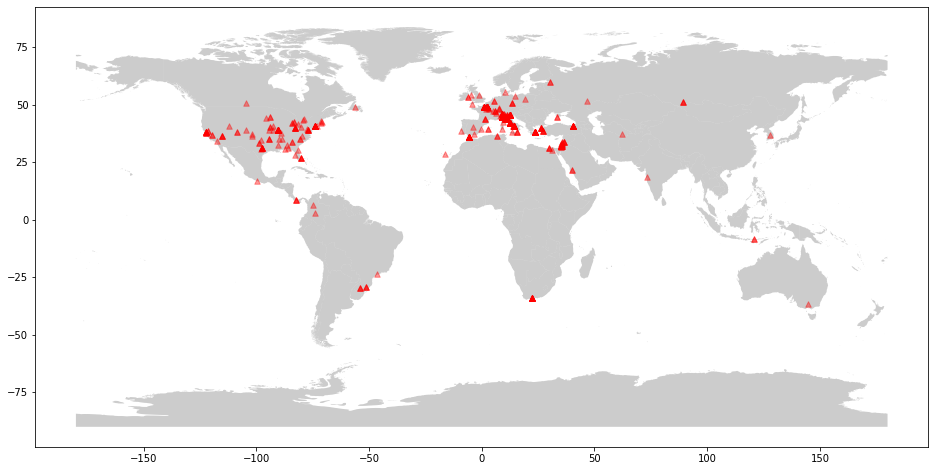

In [11]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

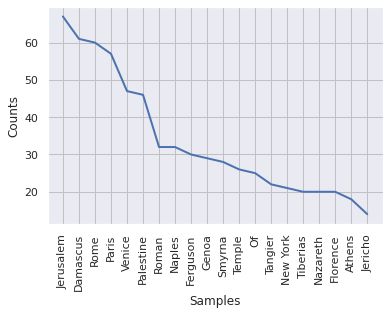

In [12]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [13]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

In [31]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("TwainCities.geojson").add_to(TwainMap)

# Display your map   
TwainMap

In [ ]:
"""
My turn! 
David Smith 
Python 3 
Scrape "Antonia" by George Sand 
"""


In [16]:
# access sands text, and decode it into utf8 
url = 'https://www.gutenberg.org/files/65170/65170-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:800]}')

<class 'str'>, 
510877, 
﻿The Project Gutenberg eBook of Antonia, by George Sand

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Antonia
       The masterpieces of George Sand. Vol. 13

Author: George Sand

Translator: George Burnham Yves

Release Date: April 26, 2021 [eBook #65170]

Language: English

Character set encoding: UTF-8

Produced by: Dagny and Laura Natal Rodrigues at Free Literature


In [18]:
#extract places and city names 
places = GeoText(raw)
cities = list(places.cities)

#get the place names connected to coordinates with Nominatim 
geolocator = Nominatim(user_agent='smithdavid529@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon


[Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Sèvres, Boulogne-Billancourt, Hauts-de-Seine, Île-de-France, France métropolitaine, 92310, France, (48.8247407, 2.2127083, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Norman, Cleveland County, Oklahoma, United States, (35.2225717, -97.4394816, 0.0)),
 Location(Sèvres, Boulogne-Billancourt, Hauts-de-Seine, Île-de-France, France métropolitaine, 92310, France, (48.8247407, 2.2127083, 0.0)),
 Location(Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye, (40.881735899999995, 40.27544376928809, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Sèvres, Boulogne-Billancourt, Hauts-de-Se

In [19]:
#put city names and coordinates into a dateframe 
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
2,"Sèvres, Boulogne-Billancourt, Hauts-de-Seine, ...","(48.8247407, 2.2127083)"
3,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
4,"Norman, Cleveland County, Oklahoma, United States","(35.2225717, -97.4394816)"
5,"Sèvres, Boulogne-Billancourt, Hauts-de-Seine, ...","(48.8247407, 2.2127083)"
6,"Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye","(40.881735899999995, 40.27544376928809)"


In [22]:
# prep coordinates for plotting 
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]

#appened the geometry, for each location 

# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
2,"Sèvres, Boulogne-Billancourt, Hauts-de-Seine, ...","(48.8247407, 2.2127083)",POINT (2.21271 48.82474)
3,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
4,"Norman, Cleveland County, Oklahoma, United States","(35.2225717, -97.4394816)",POINT (-97.43948 35.22257)


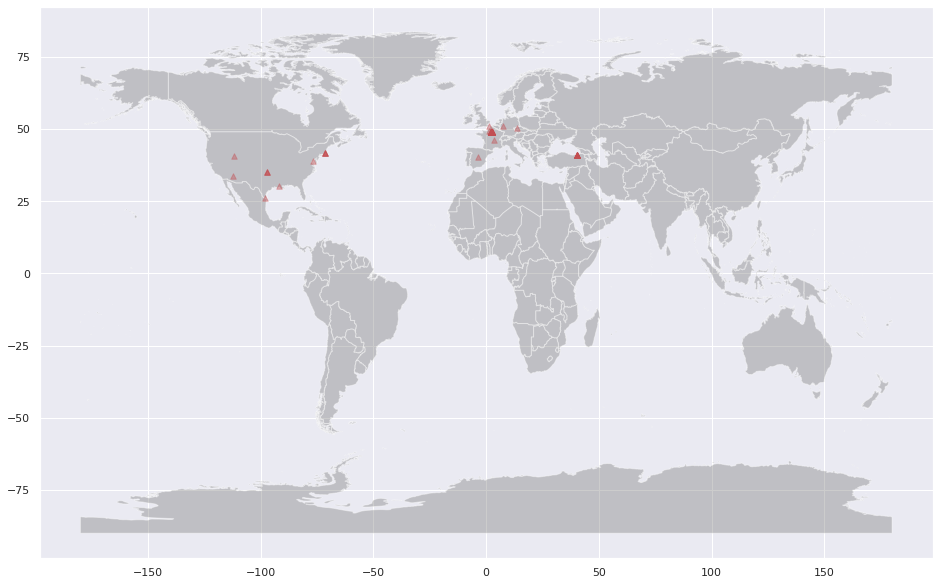

In [23]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

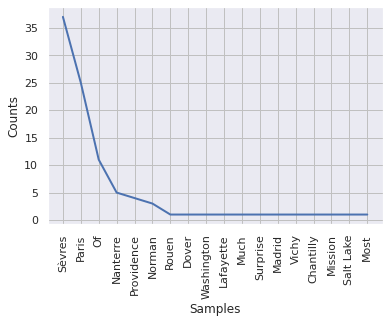

In [26]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [30]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("SandCities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
SandMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("SandCities.geojson").add_to(SandMap)

# Display your map   
SandMap